In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Dependencies for the "Get the City Weather Data" part
from citipy import citipy
import requests
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key




In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

In [3]:
# Pack the latitudes and longitudes as pairs
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
coordinates[:10]

[(-10.62591256217047, -147.76410062142367),
 (25.38858712696306, 175.69287393807036),
 (5.893409227093144, -67.40664363204593),
 (82.83827564500044, 157.2869384727921),
 (-80.2069394190045, -109.31457046594416),
 (-22.20323516614407, 101.76413065878546),
 (9.2690842996915, -118.36567346630926),
 (-87.49585119863026, -100.76305468211892),
 (7.856169097338821, -21.89249320608164),
 (67.4925141473185, -164.46513903328503)]

## CityPy. Find the nearest city

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

## Set up the API URL

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [9]:
base_url =  url + "appid=" + weather_api_key

## Get the City Weather Data

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = base_url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fare
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | puerto carreno
Processing Record 4 of Set 1 | cherskiy
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | bubaque
Processing Record 9 of Set 1 | nome
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | siparia
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | mae sai
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | sucua
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | chagda
City not found. Skipping...
Processin

Processing Record 38 of Set 4 | taoudenni
Processing Record 39 of Set 4 | port hardy
Processing Record 40 of Set 4 | pampa
Processing Record 41 of Set 4 | kungurtug
Processing Record 42 of Set 4 | vagur
Processing Record 43 of Set 4 | ostrovnoy
Processing Record 44 of Set 4 | harlingen
Processing Record 45 of Set 4 | ilulissat
Processing Record 46 of Set 4 | qui nhon
Processing Record 47 of Set 4 | mayumba
Processing Record 48 of Set 4 | nyurba
Processing Record 49 of Set 4 | saskylakh
Processing Record 50 of Set 4 | amderma
City not found. Skipping...
Processing Record 1 of Set 5 | nguiu
City not found. Skipping...
Processing Record 2 of Set 5 | narendranagar
Processing Record 3 of Set 5 | kamyshevatskaya
Processing Record 4 of Set 5 | lebu
Processing Record 5 of Set 5 | mar del plata
Processing Record 6 of Set 5 | hovd
Processing Record 7 of Set 5 | hithadhoo
Processing Record 8 of Set 5 | chapais
Processing Record 9 of Set 5 | sao francisco de paula
Processing Record 10 of Set 5 | k

Processing Record 28 of Set 8 | orkney
Processing Record 29 of Set 8 | hargeysa
Processing Record 30 of Set 8 | baijiantan
Processing Record 31 of Set 8 | norden
Processing Record 32 of Set 8 | harrogate
Processing Record 33 of Set 8 | yantal
Processing Record 34 of Set 8 | chapleau
Processing Record 35 of Set 8 | poum
Processing Record 36 of Set 8 | bilibino
Processing Record 37 of Set 8 | kisangani
Processing Record 38 of Set 8 | effingham
Processing Record 39 of Set 8 | cabedelo
Processing Record 40 of Set 8 | zhigansk
Processing Record 41 of Set 8 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 42 of Set 8 | vrangel
Processing Record 43 of Set 8 | isangel
Processing Record 44 of Set 8 | khudumelapye
Processing Record 45 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 46 of Set 8 | waiouru
Processing Record 47 of Set 8 | tessalit
Processing Record 48 of Set 8 | oga
Processing Record 49 of Set 8 | brawley
Processing Record 50 of Set 8 | college
Processing Re

Processing Record 18 of Set 12 | rosarito
Processing Record 19 of Set 12 | daru
Processing Record 20 of Set 12 | fuerte olimpo
Processing Record 21 of Set 12 | nemuro
Processing Record 22 of Set 12 | oranjemund
Processing Record 23 of Set 12 | sidney
Processing Record 24 of Set 12 | kaukauna
Processing Record 25 of Set 12 | kinablangan
Processing Record 26 of Set 12 | glenwood springs
Processing Record 27 of Set 12 | andenes
Processing Record 28 of Set 12 | boguchany
Processing Record 29 of Set 12 | asosa
Processing Record 30 of Set 12 | beeville
Processing Record 31 of Set 12 | lubumbashi
Processing Record 32 of Set 12 | san quintin
Processing Record 33 of Set 12 | puerto escondido
Processing Record 34 of Set 12 | te anau
Processing Record 35 of Set 12 | ban nahin
Processing Record 36 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 37 of Set 12 | kysyl-syr
Processing Record 38 of Set 12 | yuancheng
Processing Record 39 of Set 12 | braganca
Processing Record 40 

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fare,-16.7000,-151.0167,298.98,76,2,3.36,PF,2021-11-08 20:21:05
1,Butaritari,3.0707,172.7902,300.84,72,14,6.37,KI,2021-11-08 20:21:06
2,Puerto Carreno,6.1890,-67.4859,299.71,77,100,1.12,CO,2021-11-08 20:20:06
3,Cherskiy,68.7500,161.3000,256.63,97,100,1.35,RU,2021-11-08 20:21:06
4,Punta Arenas,-53.1500,-70.9167,286.21,44,40,7.72,CL,2021-11-08 20:21:07
5,Carnarvon,-24.8667,113.6333,292.19,68,40,8.23,AU,2021-11-08 20:21:07
6,Cabo San Lucas,22.8909,-109.9124,306.21,63,99,0.45,MX,2021-11-08 20:16:19
7,Bubaque,11.2833,-15.8333,301.77,74,73,5.52,GW,2021-11-08 20:21:08
8,Nome,64.5011,-165.4064,257.68,85,1,0.00,US,2021-11-08 20:21:08
9,Bambous Virieux,-20.3428,57.7575,298.29,83,40,3.60,MU,2021-11-08 20:21:09


Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.

In [21]:
city_data_df =  city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fare,PF,2021-11-08 20:21:05,-16.7000,-151.0167,298.98,76,2,3.36
1,Butaritari,KI,2021-11-08 20:21:06,3.0707,172.7902,300.84,72,14,6.37
2,Puerto Carreno,CO,2021-11-08 20:20:06,6.1890,-67.4859,299.71,77,100,1.12
3,Cherskiy,RU,2021-11-08 20:21:06,68.7500,161.3000,256.63,97,100,1.35
4,Punta Arenas,CL,2021-11-08 20:21:07,-53.1500,-70.9167,286.21,44,40,7.72
5,Carnarvon,AU,2021-11-08 20:21:07,-24.8667,113.6333,292.19,68,40,8.23
6,Cabo San Lucas,MX,2021-11-08 20:16:19,22.8909,-109.9124,306.21,63,99,0.45
7,Bubaque,GW,2021-11-08 20:21:08,11.2833,-15.8333,301.77,74,73,5.52
8,Nome,US,2021-11-08 20:21:08,64.5011,-165.4064,257.68,85,1,0.00
9,Bambous Virieux,MU,2021-11-08 20:21:09,-20.3428,57.7575,298.29,83,40,3.60


Create an output file to save the DataFrame as a CSV in a new folder for that file.

In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Weather Data

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

### Latitude vs. Temperature

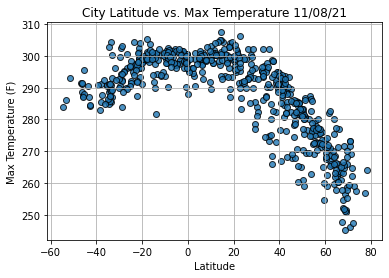

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### Latitude vs. Humidity

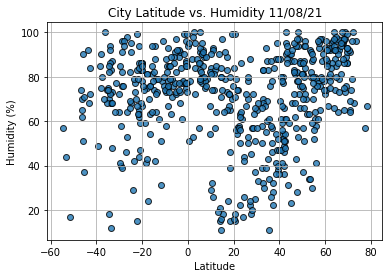

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### Plot Latitude vs. Cloudiness

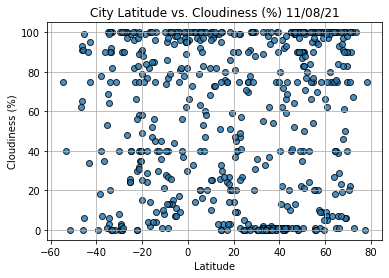

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

### Latitude vs. Wind Speed

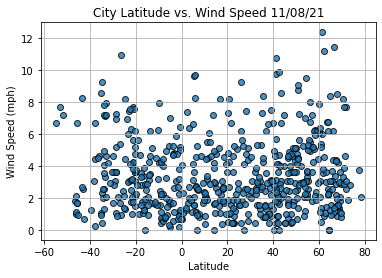

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Linear Regression

In [37]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [62]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, xy = text_coordinates, fontsize=12, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## Linear Regression for each Hemispheres

Split the DataFrame into the Northern and Southern

In [63]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Correlation Between Latitude and Maximum Temperature

Call the plot_linear_regression function with the x and y values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot.

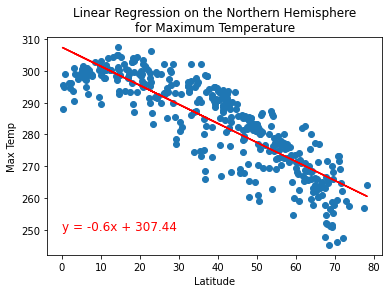

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(0,250))

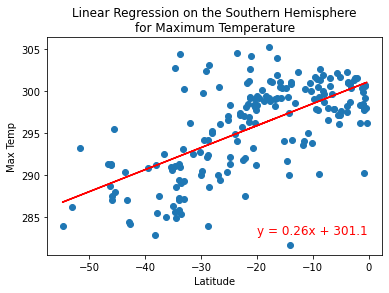

In [73]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-20,283))

### Correlation Between Latitude and Percent Humidity

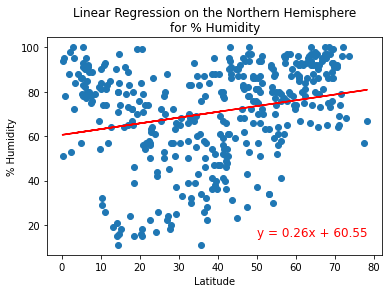

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', 
                       '% Humidity',
                       (50,15))

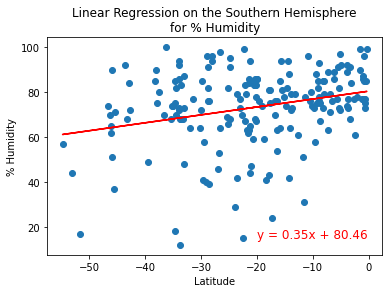

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity',
                       '% Humidity',
                       (-20,15))

### Correlation Between Latitude and Percent Cloudiness

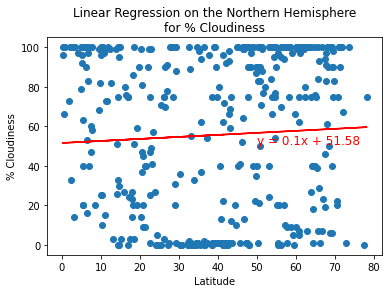

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', 
                       '% Cloudiness',
                       (50,51))

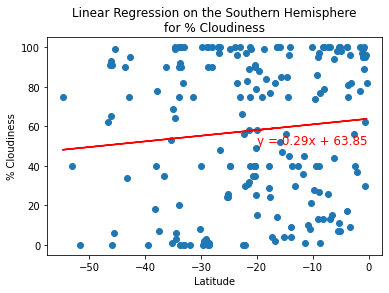

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness',
                       '% Cloudiness',
                       (-20,51))

### Correlation Between Latitude and Wind Speed

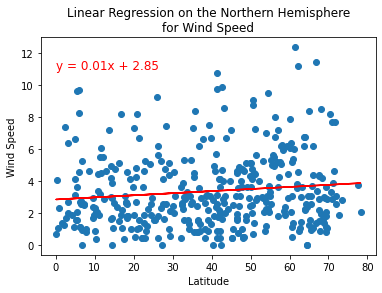

In [93]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 
                       'Wind Speed',
                       (0,11))

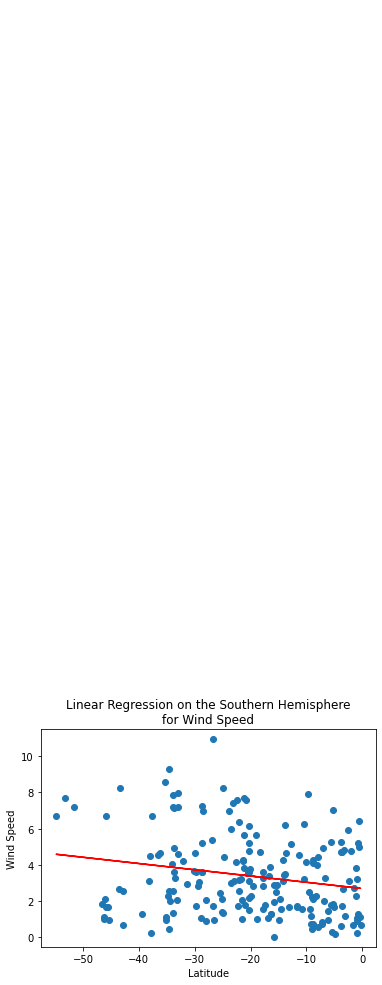

In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed',
                       'Wind Speed',
                       (-20,51))